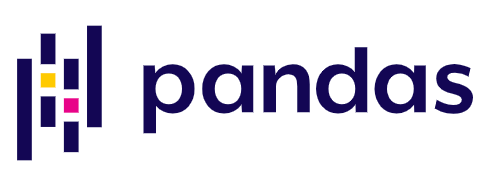

# __Pandas: Series y Dataframes__

Este Notebook contiene algunos de los principios básicos sobre:

*   Series
*   DataFrames 

Es importante aclarar que este Notebook no presenta una revisión exhaustiva sobre los temas mencionados. Para más información se sugiere consultar la [documentación oficial ](https://pandas.pydata.org/pandas-docs/stable/)


In [2]:
import pandas as pd
import numpy as np

# __Series__

La serie es una arreglo unidimensional etiquetado capaz de contener datos de cualquier tipo (entero, cadenas, flotante, objetos de Python, etc.). Las etiquetas de los ejes se denominan índices. 

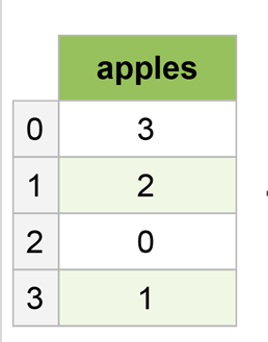

Para dar un ejemlo, comenzaremos a analizar información sobre "[The Group of Seven](https://en.wikipedia.org/wiki/Group_of_Seven)". El cual representa un grupo político formado por Canadá, Francia, Alemania, Italia, Japón, el Reino Unido y los Estados Unidos. Comenzaremos analizando la población de estos paises mediante un objeto de tipo `Pandas.Series`. 

In [3]:
# In millions
g7_pop = pd.Series([35.467, 63.951, 80.940, 60.665, 127.061, 64.511, 318.523])

In [4]:
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
dtype: float64

Alguien podría no saber que estamos representando a la población en millones de habitantes. Podemos asignar un nombre a la serie para aclarar su propósito mediante el atributo `name`

In [5]:
g7_pop.name = 'G7 Population in millions'
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
Name: G7 Population in millions, dtype: float64

Las series son muy similares a los arreglos de NumPy

In [6]:
print(f'type: {g7_pop.dtype}')
print(f'valores: {g7_pop.values}')

type: float64
valores: [ 35.467  63.951  80.94   60.665 127.061  64.511 318.523]


De hecho, en realidad son arreglos de NumPy

In [7]:
print(type(g7_pop.values))

<class 'numpy.ndarray'>


Inicialmente podríamos ver las series como listas, pero en realidad son más similares a un diccionario. Una serie tiene un índice de igual forma que el índice automático asignado a una lista de Python. Sin embargo, una serie es una estructura de datos ordenada a diferencia de un diccionario.

In [8]:
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
Name: G7 Population in millions, dtype: float64

Podemos acceder a los valores de la serie a través de los índices

In [9]:
print(g7_pop[0])
print(g7_pop[1])
print(g7_pop.index)

35.467
63.951
RangeIndex(start=0, stop=7, step=1)


Adicionalmente, podemos definir los índices según lo necesitemos (esta es una de las diferencias con las listas de python) 

In [10]:
g7_pop.index = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

Nuestra serie puede representarse con la siguiente tabla:

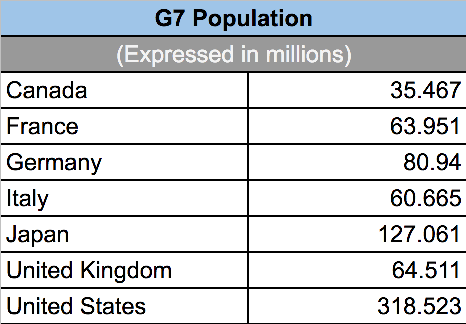

Es posible pensar una serie como un diccionario ordenado. De hecho, podemos crear una serie a partir de un diccionario 

In [11]:
g7_pop = pd.Series({
      'Canada': 35.467,
      'France': 63.951,
      'Germany': 80.94,
      'Italy': 60.665,
      'Japan': 127.061,
      'United Kingdom': 64.511,
      'United States': 318.523
  }, name='G7 Population in millions')

g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

También podemos crear la seria indicando cada elemento por separado

In [12]:
g7_pop = pd.Series(
    [35.467, 63.951, 80.94, 60.665, 127.061, 64.511, 318.523],
    index=['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
    name='G7 Population in millions')

g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

Podemos crear una nueva serie a partir de otra especificando los índices

In [13]:
another_serie = pd.Series(g7_pop, index=['France', 'Germany', 'Italy', 'Spain'])
another_serie

France     63.951
Germany    80.940
Italy      60.665
Spain         NaN
Name: G7 Population in millions, dtype: float64

## __Indexación__
Los índices de una serie funciona de manera similar a las listas y diccionarios en python. Podemos encontrar un elemento especificando su índice

In [14]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [15]:
print(g7_pop['Canada'])
print(g7_pop['Japan'])

35.467
127.061


Podemos utilizar el método `iloc` para acceder mediante un índice numérico

In [16]:
print(g7_pop.iloc[0])
print(g7_pop.iloc[-1])

35.467
318.523


Por otro lado podemos seleccionar varios elementos a la vez utilizando arreglo booleanos de la misma forma que lo hicimos con NumPy

In [17]:
g7_pop[[False, True, False, True, False, False, False]]

France    63.951
Italy     60.665
Name: G7 Population in millions, dtype: float64

Podemos seleccionar elementos específicos de la serie. El resultado será una nueva serie

In [18]:
g7_pop[['Italy', 'France']]

Italy     60.665
France    63.951
Name: G7 Population in millions, dtype: float64

Funciona igual con el método `iloc`

In [19]:
g7_pop.iloc[[0, 1]]

Canada    35.467
France    63.951
Name: G7 Population in millions, dtype: float64

Podemos particionar (slicing) una serie de forma similar como lo hacemos con una lista, sin embargo, es importante  recordar que pandas incluye el límite superior

In [20]:
g7_pop['Canada': 'Italy']

Canada     35.467
France     63.951
Germany    80.940
Italy      60.665
Name: G7 Population in millions, dtype: float64

También funciona con el método `iloc`, sin embargo, en este caso no se incluye el límite superior

In [21]:
g7_pop.iloc[0:3]

Canada     35.467
France     63.951
Germany    80.940
Name: G7 Population in millions, dtype: float64

## __Selección condicionada (boolean arrays)__

Las mismas técnicas de selección condicionada que se utilizan en los arreglos de NumPy, pueden usarse para una serie de pandas

In [22]:
a = np.arange(4)
print(a)

[0 1 2 3]


In [23]:
value = [a[0], a[-1]]
print(value)

[0, 3]


In [24]:
value = a[[0, -1]]
print(value)

[0 3]


In [25]:
value = a[[True, False, False, True]]
print(value)

[0 3]


Es importante recordar que no es necesario escribir los arreglos booleanos de forma manual ¡Podemos realizar las operaciones elemento a elemento como lo hacemos con NumPy!

In [26]:
print(a >= 2)

[False False  True  True]


Ahora podemos aplicar esta misma idea a una serie

In [27]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [28]:
g7_pop > 70

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: G7 Population in millions, dtype: bool

In [29]:
g7_pop[g7_pop > 70]

Germany           80.940
Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

In [30]:
print(f'mean: {g7_pop.mean()} \n')
print(g7_pop[g7_pop > g7_pop.mean()])

mean: 107.30257142857144 

Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64


Podemos realizar consultas compuestas utilizando los operadores lógicos `and`, `or` y `not`
* `~ not`
* `| or`
* `& and`


In [31]:
g7_pop[(g7_pop > 80) | (g7_pop < 40)]

Canada            35.467
Germany           80.940
Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

In [32]:
g7_pop[(g7_pop > 80) & (g7_pop < 200)]

Germany     80.940
Japan      127.061
Name: G7 Population in millions, dtype: float64

In [33]:
print(f'mean: {g7_pop.mean()} \nstd: {g7_pop.std()} \n')
g7_pop[(g7_pop > (g7_pop.mean() - g7_pop.std() / 2)) | (g7_pop > (g7_pop.mean() + g7_pop.std() / 2))]

mean: 107.30257142857144 
std: 97.24996987121581 



France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

## __Operaciones y métodos__ 

Es posible realizar operaciones elemento a elemento en una serie:

In [34]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [35]:
g7_pop * 1000000

Canada             35467000.0
France             63951000.0
Germany            80940000.0
Italy              60665000.0
Japan             127061000.0
United Kingdom     64511000.0
United States     318523000.0
Name: G7 Population in millions, dtype: float64

In [36]:
np.log(g7_pop)

Canada            3.568603
France            4.158117
Germany           4.393708
Italy             4.105367
Japan             4.844667
United Kingdom    4.166836
United States     5.763695
Name: G7 Population in millions, dtype: float64

In [37]:
g7_pop['France': 'Italy'].mean()

68.51866666666666

In [38]:
g7_pop.iloc[1:4].mean()

68.51866666666666

## __Modificando una serie__

Podemos modificar una serie haciendo referencia directa a los índices 

In [39]:
g7_pop = pd.Series(
    [35.467, 63.951, 80.94, 60.665, 127.061, 64.511, 318.523],
    index=['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
    name='G7 Population in millions')

g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [40]:
g7_pop['Canada'] = 40.5
print(g7_pop)

Canada             40.500
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64


In [41]:
g7_pop.iloc[-1] = 500
g7_pop

Canada             40.500
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     500.000
Name: G7 Population in millions, dtype: float64

In [42]:
g7_pop[g7_pop < 70] = 99.99
g7_pop

Canada             99.990
France             99.990
Germany            80.940
Italy              99.990
Japan             127.061
United Kingdom     99.990
United States     500.000
Name: G7 Population in millions, dtype: float64

## __Resumen estadístico__
Podemos obtener un resumen estadístico de la serie que nos permita comprender mejor la forma de los datos

In [43]:
g7_pop.describe()

count      7.000000
mean     158.280143
std      151.283154
min       80.940000
25%       99.990000
50%       99.990000
75%      113.525500
max      500.000000
Name: G7 Population in millions, dtype: float64

El resultado de aplicar la función `describe()` es una nueva serie

In [44]:
g7_pop.describe()[['mean', 'std', 'min', 'max']]

mean    158.280143
std     151.283154
min      80.940000
max     500.000000
Name: G7 Population in millions, dtype: float64

También es posible calcular estos valores de forma independiente

In [45]:
g7_pop.count()

7

In [46]:
g7_pop.mean()

158.28014285714286

In [47]:
g7_pop.std()

151.28315414086765

In [48]:
g7_pop.median()

99.99

In [49]:
g7_pop.quantile(.75)

113.5255

In [50]:
g7_pop.quantile([.2, .4, .6, .8, 1])

0.2     99.9900
0.4     99.9900
0.6     99.9900
0.8    121.6468
1.0    500.0000
Name: G7 Population in millions, dtype: float64

In [51]:
g7_pop.mode()

0    99.99
dtype: float64

In [52]:
g7_pop.cumsum() 

Canada              99.990
France             199.980
Germany            280.920
Italy              380.910
Japan              507.971
United Kingdom     607.961
United States     1107.961
Name: G7 Population in millions, dtype: float64

In [53]:
g7_pop.cumsum() / g7_pop.sum()

Canada            0.090247
France            0.180494
Germany           0.253547
Italy             0.343794
Japan             0.458474
United Kingdom    0.548721
United States     1.000000
Name: G7 Population in millions, dtype: float64

#  __DataFrames__

Probablemente la estructura de datos más importante de Pandas es el `DataFrame`. Es una estructura tabular firmemente integrada con `series`. Podemos pensar en un DataFrame como una colección de series (Podemos verla como una hoja de excel manipulada desde python)

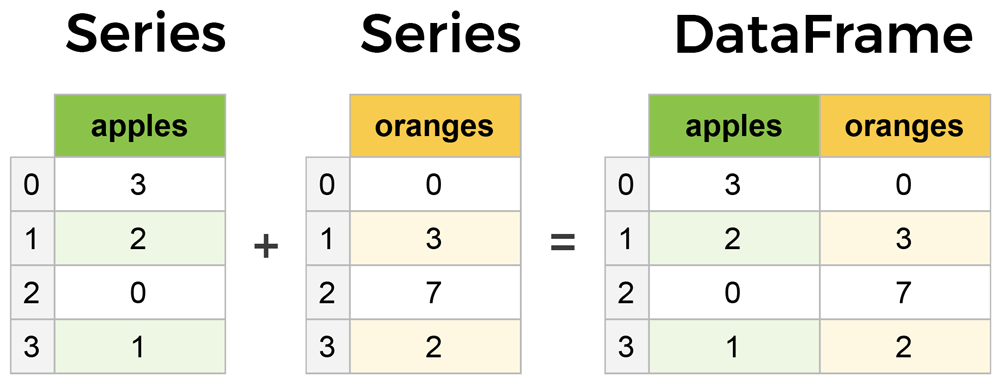


In [54]:
import numpy as np
import pandas as pd

Continuaremos nuestro análisis utilizando los paisis del G7 "[The Group of Seven](https://en.wikipedia.org/wiki/Group_of_Seven)". En este caso, nuestro Dataframe se verá como la siguiente tabla

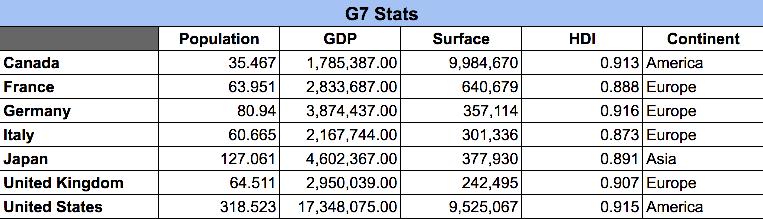

Crear Dataframes manualmente puede ser tedioso. El $99\%$ del tiempo obtendrá los datos de una base de datos, un archivo CSV o la web. Pero aún así, puede crear un flujo de datos especificando las columnas y los valores: 


In [55]:
df = pd.DataFrame({
    'Population': [35.467, 63.951, 80.94 , 60.665, 127.061, 64.511, 318.523],
    'GDP': [
        1785387,
        2833687,
        3874437,
        2167744,
        4602367,
        2950039,
        17348075
    ],
    'Surface Area': [
        9984670,
        640679,
        357114,
        301336,
        377930,
        242495,
        9525067
    ],
    'HDI': [
        0.913,
        0.888,
        0.916,
        0.873,
        0.891,
        0.907,
        0.915
    ],
    'Continent': [
        'America',
        'Europe',
        'Europe',
        'Europe',
        'Asia',
        'Europe',
        'America'
    ]
}, columns=['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'])

El atributo de las columnas es opcional. Lo utilizaremos para mantener el mismo orden que en la imagen de arriba 

In [56]:
df

,Population,GDP,Surface Area,HDI,Continent
0,35.467,1785387,9984670,0.913,America
1,63.951,2833687,640679,0.888,Europe
2,80.940,3874437,357114,0.916,Europe
3,60.665,2167744,301336,0.873,Europe
4,127.061,4602367,377930,0.891,Asia
5,64.511,2950039,242495,0.907,Europe
6,318.523,17348075,9525067,0.915,America


Los DataFrames también tienen índices. Podemos observar como Pandas ha asignado automáticamente un índice numérico y autoincremental a cada fila. En este caso, sabemos que cada fila representa un país, por lo que simplemente podemos reasignar los índices índice: 

In [57]:
df.index = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


Podemos obtener una lista con los índices y las columnas referenciando los siguientes atributos en el Dataframe:


In [58]:
df.columns

Index(['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'], dtype='object')

In [59]:
df.index

Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
      dtype='object')

Adicionalmente, podemos obtener información sobre la estructura de nuestro DataFrame utilizando los siguientes métodos

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Canada to United States
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    7 non-null      float64
 1   GDP           7 non-null      int64  
 2   Surface Area  7 non-null      int64  
 3   HDI           7 non-null      float64
 4   Continent     7 non-null      object 
dtypes: float64(2), int64(2), object(1)
memory usage: 336.0+ bytes


In [61]:
df.size

35

In [62]:
df.shape

(7, 5)

In [63]:
df.describe()

,Population,GDP,Surface Area,HDI
count,7.000000,7.000000e+00,7.000000e+00,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429
std,97.249970,5.494020e+06,4.576187e+06,0.016592
min,35.467000,1.785387e+06,2.424950e+05,0.873000
25%,62.308000,2.500716e+06,3.292250e+05,0.889500
50%,64.511000,2.950039e+06,3.779300e+05,0.907000
75%,104.000500,4.238402e+06,5.082873e+06,0.914000
max,318.523000,1.734808e+07,9.984670e+06,0.916000


In [64]:
df.dtypes

Population      float64
GDP               int64
Surface Area      int64
HDI             float64
Continent        object
dtype: object

In [65]:
df.dtypes.value_counts()

float64    2
int64      2
object     1
dtype: int64

## __Manipulando DataFrames__

Las columnas individuales en un DataFrame se pueden seleccionar con indexación simple. Cada columna se representa como una serie: 

In [66]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


El método `loc` me permite seleccionar los valores de una fila en el DataFrame

In [67]:
df.loc['Canada']

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

El resultado sera una serie

In [68]:
type(df.loc['Canada'])

pandas.core.series.Series

De igual forma, podemos utilizar el método iloc para traer la información de una fila

In [69]:
df.iloc[0]

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

Podemos utilizar indexación múltiple con las funciones `loc` y `iloc`, sin embargo, debemos recordar que la el método `loc` incluye al limite superior y `iloc` no lo hace

In [70]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [71]:
df.loc['Canada': 'Japan']

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia


In [72]:
df.iloc[:5]

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia


In [73]:
df.loc['Canada': 'Japan', :]

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia


In [74]:
df.loc['Canada': 'Japan', 'GDP': 'HDI']

,GDP,Surface Area,HDI
Canada,1785387,9984670,0.913
France,2833687,640679,0.888
Germany,3874437,357114,0.916
Italy,2167744,301336,0.873
Japan,4602367,377930,0.891


In [75]:
df.loc['Canada': 'Japan', ['GDP', 'HDI', 'Continent']]

,GDP,HDI,Continent
Canada,1785387,0.913,America
France,2833687,0.888,Europe
Germany,3874437,0.916,Europe
Italy,2167744,0.873,Europe
Japan,4602367,0.891,Asia


In [76]:
df.loc[['Canada', 'Germany', 'Japan'], ['Population', 'Surface Area', 'Continent']]

,Population,Surface Area,Continent
Canada,35.467,9984670,America
Germany,80.940,357114,Europe
Japan,127.061,377930,Asia


In [77]:
df.loc['Japan', 'Surface Area']

377930

Podemos realizar los mismos pasos utilzando el método `iloc`

In [78]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [79]:
df.iloc[[0, 2, 4]]

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia


In [80]:
df.iloc[:-1, 2:5]

,Surface Area,HDI,Continent
Canada,9984670,0.913,America
France,640679,0.888,Europe
Germany,357114,0.916,Europe
Italy,301336,0.873,Europe
Japan,377930,0.891,Asia
United Kingdom,242495,0.907,Europe


In [81]:
df.iloc[ :-1, [0, 2, 4]]

,Population,Surface Area,Continent
Canada,35.467,9984670,America
France,63.951,640679,Europe
Germany,80.940,357114,Europe
Italy,60.665,301336,Europe
Japan,127.061,377930,Asia
United Kingdom,64.511,242495,Europe


In [82]:
df.iloc[0, 2]

9984670

Para un columna únicamente debemos utilizar su indentificador

In [83]:
df['Population']

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: Population, dtype: float64

Debemos tener en cuenta que el índice de la serie devuelta es el mismo del DataFrame y su nombre será el de la columna. Si queremos algo más parecido a un DataFrame podemos utilizar `to_frame`: 

In [84]:
df['Population'].to_frame()

,Population
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


Adicionalmente, podemos acceder a las columnas colocando un punto y el nombre de las columnas, sin embargo, no funciona en caso que el nombre de la columna tenga espacios

In [85]:
df.Population

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: Population, dtype: float64

In [86]:
df.Continent.to_frame()

,Continent
Canada,America
France,Europe
Germany,Europe
Italy,Europe
Japan,Asia
United Kingdom,Europe
United States,America


También podemos utilizar indexación múltiple:  

In [87]:
df[['Population', 'GDP', 'HDI']]

,Population,GDP,HDI
Canada,35.467,1785387,0.913
France,63.951,2833687,0.888
Germany,80.940,3874437,0.916
Italy,60.665,2167744,0.873
Japan,127.061,4602367,0.891
United Kingdom,64.511,2950039,0.907
United States,318.523,17348075,0.915


## __Selección condicionada (boolean arrays)__

Las mismas técnicas de selección condicionada utilizadas en series pueden usarse para manipular un DataFrame 

In [88]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [89]:
df['Population'] > 70

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: Population, dtype: bool

In [90]:
df.loc[df['Population'] > 70]

,Population,GDP,Surface Area,HDI,Continent
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United States,318.523,17348075,9525067,0.915,America


In [91]:
df.loc[df.Population > 70]

,Population,GDP,Surface Area,HDI,Continent
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United States,318.523,17348075,9525067,0.915,America


La coincidencia booleana se realiza a nivel de índices por lo que es posible  filtrar cualquier fila siempre que contenga los índices correctos. La selección de columnas se realiza como se mostró anteriormente

In [92]:
df.loc[df['Population'] > 70, 'Population'].to_frame()

,Population
Germany,80.940
Japan,127.061
United States,318.523


In [93]:
df.loc[df['Population'] > 70, ['Population', 'Continent']]

,Population,Continent
Germany,80.940,Europe
Japan,127.061,Asia
United States,318.523,America


In [94]:
df.loc[df.Population > 70 , ['Population', 'Continent']]

,Population,Continent
Germany,80.940,Europe
Japan,127.061,Asia
United States,318.523,America


## __Eliminando información__

En lugar de señalar qué valores que deseamos seleccionar, podemos apuntar a aquellos que deseamos eliminar: 

In [95]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


Por defecto, el método `drop` trabaja a nivel de filas

In [96]:
df.drop('Canada')

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


También podemos utilizar indexación múltiple

In [97]:
df.drop(['Canada', 'Japan'])

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


Esta expresión es equivalente a la anterior

In [98]:
df.drop(['Japan', 'Canada'], axis=0)

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


Esta expresión es equivalente a las dos anteriores

In [99]:
df.drop(['Italy', 'Canada'], axis='rows')

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


Si queremos eliminar columnas podemos hacerlo de la siguiente forma

In [100]:
df.drop(columns=['Population', 'HDI'])

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


Esta expresión es equivalente a la anterior

In [101]:
df.drop(['Population', 'HDI'], axis=1)

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


Esta expresión es equivalente a las dos anteriores

In [102]:
df.drop(['Population', 'HDI'], axis='columns')

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


Todos estos métodos retornan un nuevo DataFrame (no modifican el original). Si queremos cambiar el original, es posible usar el atributo `inplace`. 

In [103]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [104]:
df.drop(['Population', 'HDI'], axis='columns', inplace=True)

In [105]:
df

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


## __Operaciones y métodos__

Es posible realizar operaciones elemento a elemento en un DataFrame. (Antes debemos definir nuevamente el DataFrame ya que en la celda anterior eliminamos dos de sus columnas)

In [106]:
df = pd.DataFrame({
    'Population': [35.467, 63.951, 80.94 , 60.665, 127.061, 64.511, 318.523],
    'GDP': [
        1785387,
        2833687,
        3874437,
        2167744,
        4602367,
        2950039,
        17348075
    ],
    'Surface Area': [
        9984670,
        640679,
        357114,
        301336,
        377930,
        242495,
        9525067
    ],
    'HDI': [
        0.913,
        0.888,
        0.916,
        0.873,
        0.891,
        0.907,
        0.915
    ],
    'Continent': [
        'America',
        'Europe',
        'Europe',
        'Europe',
        'Asia',
        'Europe',
        'America'
    ]
}, columns=['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'])

df.index = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]


In [107]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


Podemos realizar operaciones elemento a elemento

In [108]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744
Japan,127.061,4602367
United Kingdom,64.511,2950039
United States,318.523,17348075


In [109]:
df[['Population', 'GDP']] / 100

,Population,GDP
Canada,0.35467,17853.87
France,0.63951,28336.87
Germany,0.80940,38744.37
Italy,0.60665,21677.44
Japan,1.27061,46023.67
United Kingdom,0.64511,29500.39
United States,3.18523,173480.75


Las Operaciones con series funcionan a nivel de columna, operando las filas (puede ser un poco contraintuitivo). 

In [110]:
crisis = pd.Series([0, 0], index=['GDP', 'HDI'], name='example')
crisis.to_frame()

,example
GDP,0
HDI,0


In [111]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [112]:
df[['GDP', 'HDI']] * crisis

,GDP,HDI
Canada,0,0.0
France,0,0.0
Germany,0,0.0
Italy,0,0.0
Japan,0,0.0
United Kingdom,0,0.0
United States,0,0.0


## __Modificando un DataFrame__
Es posible agregar columnas, o reemplazar valores en una columna de una manera muy simple. Primero definamos un nueva columna como una serie

In [113]:
langs = pd.Series(
    ['French', 'German', 'Italian'],
    index=['France', 'Germany', 'Italy'],
    name='Language'
)
langs.to_frame()

,Language
France,French
Germany,German
Italy,Italian


La siguiente expresión permite agregar una nueva columna al DataFrame

In [114]:
df['Language'] = langs
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,NaN
France,63.951,2833687,640679,0.888,Europe,French
Germany,80.940,3874437,357114,0.916,Europe,German
Italy,60.665,2167744,301336,0.873,Europe,Italian
Japan,127.061,4602367,377930,0.891,Asia,NaN
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN
United States,318.523,17348075,9525067,0.915,America,NaN


Podemos modificar todos los valores de una columna

In [115]:
df['Language'] = 'English'
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
United Kingdom,64.511,2950039,242495,0.907,Europe,English
United States,318.523,17348075,9525067,0.915,America,English


Es posible renombrar los identificadores de las columnas y los índices

In [116]:
df.rename(
    columns={
        'HDI': 'Human Development Index',
        'Anual Popcorn Consumption': 'APC'
    }, index={
        'United States': 'USA',
        'United Kingdom': 'UK',
        'Argentina': 'AR'
    })

,Population,GDP,Surface Area,Human Development Index,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
UK,64.511,2950039,242495,0.907,Europe,English
USA,318.523,17348075,9525067,0.915,America,English


Podemos aplicar funciones para modificar directamente el valor de los índices o las columnas

In [117]:
df.rename(index=str.lower)

,Population,GDP,Surface Area,HDI,Continent,Language
canada,35.467,1785387,9984670,0.913,America,English
france,63.951,2833687,640679,0.888,Europe,English
germany,80.940,3874437,357114,0.916,Europe,English
italy,60.665,2167744,301336,0.873,Europe,English
japan,127.061,4602367,377930,0.891,Asia,English
united kingdom,64.511,2950039,242495,0.907,Europe,English
united states,318.523,17348075,9525067,0.915,America,English


También podemos utilizar funciones `lambda` (funciones anónimas)

In [118]:
df.rename(index=lambda x: x.upper())

,Population,GDP,Surface Area,HDI,Continent,Language
CANADA,35.467,1785387,9984670,0.913,America,English
FRANCE,63.951,2833687,640679,0.888,Europe,English
GERMANY,80.940,3874437,357114,0.916,Europe,English
ITALY,60.665,2167744,301336,0.873,Europe,English
JAPAN,127.061,4602367,377930,0.891,Asia,English
UNITED KINGDOM,64.511,2950039,242495,0.907,Europe,English
UNITED STATES,318.523,17348075,9525067,0.915,America,English


Podemos crear nuestras Propias funciones


In [119]:
def my_function(string):
  if 'a' in string:
    return string.replace('a', 'X')
  return string.upper()    


In [120]:
df.rename(columns=my_function)

,PopulXtion,GDP,SurfXce AreX,HDI,CONTINENT,LXnguXge
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
United Kingdom,64.511,2950039,242495,0.907,Europe,English
United States,318.523,17348075,9525067,0.915,America,English


Para eliminar un columan podemos utilizar el método `drop`

In [121]:
df.drop(columns='Language')

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


Es importante recordar que el método `Drop ` devuelve un nuevo DataFrame, si queremos modificar el DataFrame original debemos agregar el atributo `inplace=True`

In [122]:
df.drop(columns='Language', inplace=True)
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


También es posible agregar valores al DataFrame con el método `append`

In [123]:
df.append(pd.Series({
    'Population': 3,
    'GDP': 5
}, name='China'))

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387.0,9984670.0,0.913,America
France,63.951,2833687.0,640679.0,0.888,Europe
Germany,80.940,3874437.0,357114.0,0.916,Europe
Italy,60.665,2167744.0,301336.0,0.873,Europe
Japan,127.061,4602367.0,377930.0,0.891,Asia
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe
United States,318.523,17348075.0,9525067.0,0.915,America
China,3.000,5.0,NaN,NaN,NaN


El método `append` también retorna un nuevo DataFrame

In [124]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


Otra forma de agregar los valores sería a través del método `loc`. En este caso si modificamos el DataFrame original

In [125]:
df.loc['China'] = pd.Series({'Population': 1400000000, 'Continent': 'Asia'})

In [126]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,3.546700e+01,1785387.0,9984670.0,0.913,America
France,6.395100e+01,2833687.0,640679.0,0.888,Europe
Germany,8.094000e+01,3874437.0,357114.0,0.916,Europe
Italy,6.066500e+01,2167744.0,301336.0,0.873,Europe
Japan,1.270610e+02,4602367.0,377930.0,0.891,Asia
United Kingdom,6.451100e+01,2950039.0,242495.0,0.907,Europe
United States,3.185230e+02,17348075.0,9525067.0,0.915,America
China,1.400000e+09,NaN,NaN,NaN,Asia


Podemos eliminar a china utilizando el método `drop`

In [127]:
df.drop('China', inplace=True)

Si lo necesitamos podemos rinicial los índices y asignar otra columna

In [128]:
df.reset_index()

,index,Population,GDP,Surface Area,HDI,Continent
0,Canada,35.467,1785387.0,9984670.0,0.913,America
1,France,63.951,2833687.0,640679.0,0.888,Europe
2,Germany,80.940,3874437.0,357114.0,0.916,Europe
3,Italy,60.665,2167744.0,301336.0,0.873,Europe
4,Japan,127.061,4602367.0,377930.0,0.891,Asia
5,United Kingdom,64.511,2950039.0,242495.0,0.907,Europe
6,United States,318.523,17348075.0,9525067.0,0.915,America


In [129]:
df.set_index('Population')

,GDP,Surface Area,HDI,Continent
Population,,,,
35.467,1785387.0,9984670.0,0.913,America
63.951,2833687.0,640679.0,0.888,Europe
80.940,3874437.0,357114.0,0.916,Europe
60.665,2167744.0,301336.0,0.873,Europe
127.061,4602367.0,377930.0,0.891,Asia
64.511,2950039.0,242495.0,0.907,Europe
318.523,17348075.0,9525067.0,0.915,America


Adicionalmente, podemos definir columnas a partir de otras columnas. Por ejemplo, podríamos intentar calcular el "GDP per cápita", que es solo, `GDP / Population`. 

In [130]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387.0
France,63.951,2833687.0
Germany,80.940,3874437.0
Italy,60.665,2167744.0
Japan,127.061,4602367.0
United Kingdom,64.511,2950039.0
United States,318.523,17348075.0


La forma usal de realizar este proceso es realizar la operación de división entre ambas series

In [131]:
(df['GDP'] / df['Population']).to_frame()

,0
Canada,50339.385908
France,44310.284437
Germany,47868.013343
Italy,35733.025633
Japan,36221.712406
United Kingdom,45729.239975
United States,54464.120330


In [132]:
df['GDP Per Capita'] = df['GDP'] / df['Population']
df

,Population,GDP,Surface Area,HDI,Continent,GDP Per Capita
Canada,35.467,1785387.0,9984670.0,0.913,America,50339.385908
France,63.951,2833687.0,640679.0,0.888,Europe,44310.284437
Germany,80.940,3874437.0,357114.0,0.916,Europe,47868.013343
Italy,60.665,2167744.0,301336.0,0.873,Europe,35733.025633
Japan,127.061,4602367.0,377930.0,0.891,Asia,36221.712406
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe,45729.239975
United States,318.523,17348075.0,9525067.0,0.915,America,54464.120330


## __Resumen estadístico__

Es posible utilizar los métodos `head()` y `tail()` para explorar las primeras y las últimas 5 filas del DataFrame (podemos agregar un parámetro para señalar cuantas filas queremos mostrar)

In [133]:
df.head(2)

,Population,GDP,Surface Area,HDI,Continent,GDP Per Capita
Canada,35.467,1785387.0,9984670.0,0.913,America,50339.385908
France,63.951,2833687.0,640679.0,0.888,Europe,44310.284437


In [134]:
df.tail(2)

,Population,GDP,Surface Area,HDI,Continent,GDP Per Capita
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe,45729.239975
United States,318.523,17348075.0,9525067.0,0.915,America,54464.120330


Podemos obetner un resumen estadístico para comprender mejor la forma de los datos

In [135]:
df.describe()

,Population,GDP,Surface Area,HDI,GDP Per Capita
count,7.000000,7.000000e+00,7.000000e+00,7.000000,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429,44952.254576
std,97.249970,5.494020e+06,4.576187e+06,0.016592,6954.983875
min,35.467000,1.785387e+06,2.424950e+05,0.873000,35733.025633
25%,62.308000,2.500716e+06,3.292250e+05,0.889500,40265.998421
50%,64.511000,2.950039e+06,3.779300e+05,0.907000,45729.239975
75%,104.000500,4.238402e+06,5.082873e+06,0.914000,49103.699626
max,318.523000,1.734808e+07,9.984670e+06,0.916000,54464.120330


In [136]:
df['Population'].min(), df['Population'].max()

(35.467, 318.523)

In [137]:
df.Population.min(), df.Population.max()

(35.467, 318.523)

In [138]:
df.Population.sum() / df.Population.count()

107.30257142857144

In [139]:
df2 = pd.Series(df[['Population', 'HDI', 'GDP' ]].mean(), name='mean')
df2.to_frame()


,mean
Population,1.073026e+02
HDI,9.004286e-01
GDP,5.080248e+06


In [140]:
df.Population.quantile([.2, .4, .6, .8, 1]).to_frame()


,Population
0.2,61.3222
0.4,64.1750
0.6,74.3684
0.8,117.8368
1.0,318.5230


## __Métodos `map()` y `apply()`__

Los métodos `map()` nos permite realizar cambios sobre una columna (funciona a nivel de serie) y la función `apply()` nos permite aplicar cambios a todos los elementos de un DataFrame. Veamos un ejemplo

In [141]:
df

,Population,GDP,Surface Area,HDI,Continent,GDP Per Capita
Canada,35.467,1785387.0,9984670.0,0.913,America,50339.385908
France,63.951,2833687.0,640679.0,0.888,Europe,44310.284437
Germany,80.940,3874437.0,357114.0,0.916,Europe,47868.013343
Italy,60.665,2167744.0,301336.0,0.873,Europe,35733.025633
Japan,127.061,4602367.0,377930.0,0.891,Asia,36221.712406
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe,45729.239975
United States,318.523,17348075.0,9525067.0,0.915,America,54464.120330


Es importante recordar que solo podemos utilizar `map` con una columna de nuestro `DataFrame`

In [142]:
df.Population.map(lambda population: population / 100).to_frame()

,Population
Canada,0.35467
France,0.63951
Germany,0.80940
Italy,0.60665
Japan,1.27061
United Kingdom,0.64511
United States,3.18523


In [143]:
df.Continent = df.Continent.map({'America':'AmErIcA', 'Europe':'EuRoPe', 'Asia': 'AsIa'})
df

,Population,GDP,Surface Area,HDI,Continent,GDP Per Capita
Canada,35.467,1785387.0,9984670.0,0.913,AmErIcA,50339.385908
France,63.951,2833687.0,640679.0,0.888,EuRoPe,44310.284437
Germany,80.940,3874437.0,357114.0,0.916,EuRoPe,47868.013343
Italy,60.665,2167744.0,301336.0,0.873,EuRoPe,35733.025633
Japan,127.061,4602367.0,377930.0,0.891,AsIa,36221.712406
United Kingdom,64.511,2950039.0,242495.0,0.907,EuRoPe,45729.239975
United States,318.523,17348075.0,9525067.0,0.915,AmErIcA,54464.120330


Podemos utilizar la función `apply()` para operar sobre todo el DataFrame. Veamos un ejemplo

In [144]:
population_area = df.apply(lambda x: (x['Population'] / x['Surface Area']) * 100, axis=1)
population_area.name = 'Population / area'
population_area.to_frame()

,Population / area
Canada,0.000355
France,0.009982
Germany,0.022665
Italy,0.020132
Japan,0.033620
United Kingdom,0.026603
United States,0.003344


Podemos agregar la nueva columna al dataFrame

In [145]:
df[population_area.name] = population_area
df

,Population,GDP,Surface Area,HDI,Continent,GDP Per Capita,Population / area
Canada,35.467,1785387.0,9984670.0,0.913,AmErIcA,50339.385908,0.000355
France,63.951,2833687.0,640679.0,0.888,EuRoPe,44310.284437,0.009982
Germany,80.940,3874437.0,357114.0,0.916,EuRoPe,47868.013343,0.022665
Italy,60.665,2167744.0,301336.0,0.873,EuRoPe,35733.025633,0.020132
Japan,127.061,4602367.0,377930.0,0.891,AsIa,36221.712406,0.033620
United Kingdom,64.511,2950039.0,242495.0,0.907,EuRoPe,45729.239975,0.026603
United States,318.523,17348075.0,9525067.0,0.915,AmErIcA,54464.120330,0.003344


In [146]:
df.drop(columns=['Continent']).apply(lambda x : x.sum(), axis=0).to_frame()

,0
Population,7.511180e+02
GDP,3.556174e+07
Surface Area,2.142929e+07
HDI,6.303000e+00
GDP Per Capita,3.146658e+05
Population / area,1.167013e-01


## __Leer Archivos externos__

La forma más usual de cargar datos a un DataFrame es através de una fuente externa. A continuación veremos un ejemplo de uno de los métodos más comunes: leer un archivo plano desde un url externa.

In [147]:
df = pd.read_csv('https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/EDA/btc-market-price.csv')
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


Pandas asume que la primera línea serán los nombres de las columnas. Para solucionar esto podemos utilizar el parámetro `header= None`

In [148]:
df = pd.read_csv('https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/EDA/btc-market-price.csv', header=None)
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


Ahora podemos establecer los identificadores de cada columna

In [149]:
df.columns = ['Timestamp', 'Price']
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [150]:
df.shape

(365, 2)

In [151]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

Podemos convertir las fechas a un formato más adecuado

In [152]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

In [153]:
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


El método `read_csv` tiene muchas posibilidades. Podemos realizar todo el proceso anterior en una sola linea

In [154]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/EDA/btc-market-price.csv',
    header=None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True
)
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


Siempre será de gran utilidad consultar la documentación oficial: [https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)